In [8]:
from sklearn.feature_selection import RFECV
import pandas as pd
pd.set_option('max_columns',None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from numpy import mean,std
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../Datasets/oversampled_data.csv')
data.head()

,Unnamed: 0,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0


In [3]:
del data['Unnamed: 0']

In [6]:
std_sclr = StandardScaler()
X = data.drop(labels='churn',axis=1)
cols = X.columns
X = pd.DataFrame(std_sclr.fit_transform(X))
X.columns = cols
y = data[['churn']]
X.shape,y.shape


((5700, 18), (5700, 1))

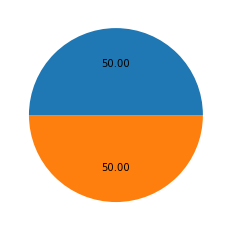

In [9]:
plt.pie(y.value_counts(),autopct='%.2f')
plt.show()

In [10]:
# create pipeline
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

In [11]:
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.984 (0.005)


In [12]:
rfe.fit(X,y)
X.columns[rfe.get_support()]

Index(['account_length', 'voice_mail_messages', 'day_mins', 'evening_mins',
       'night_mins', 'international_mins', 'customer_service_calls',
       'international_plan', 'day_calls', 'day_charge', 'evening_calls',
       'evening_charge', 'night_calls', 'international_calls',
       'international_charge', 'total_charge'],
      dtype='object')

In [13]:
len(X.columns[rfe.get_support()])

16